### Pandas tutorial: Brandon Rhodes (Pycon 2015)
#### IMDB dataset


In [68]:
import pandas as pd

In [2]:
import qgrid # qgrid lets you interact with your dataset

In [5]:
qgrid.nbinstall(overwrite=True) 

In [6]:
titles = pd.read_csv('titles.csv', index_col=None)

In [69]:
h = titles.head()

In [8]:
df = qgrid.show_grid(titles)

In [9]:
type(titles)

pandas.core.frame.DataFrame

In [72]:
titles.dtypes

title    object
year      int64
dtype: object

#### Total number of movies?

In [10]:
titles.shape # Number of movies: 231351

(231351, 2)

#### What are the three earliest movies?

In [11]:
titles.sort_values('year')[:3] # three earliest movies

,title,year
177015,Miss Jerry,1894
214352,The Startled Lover,1898
123994,Reproduction of the Corbett and Jeffries Fight,1899


In [12]:
tf = titles.sort('year') # head and tail are the way to go
tf.head(2)

,title,year
177015,Miss Jerry,1894
214352,The Startled Lover,1898


In [13]:
tf.tail(2)

,title,year
102105,Settling of Score,2026
65220,War in Snow,2026


In [14]:
titles.sort_values('year')[-3:] # three latest movies 

,title,year
71656,Gods Heart,2025
102105,Settling of Score,2026
65220,War in Snow,2026


In [15]:
h['year'] //10 * 10 # decades, first slice to divide and second to truncate

0    1990
1    1960
2    1990
3    2000
4    2010
Name: year, dtype: int64

In [16]:
h.year > 1985 # comparison gives boolians

0     True
1    False
2     True
3     True
4     True
Name: year, dtype: bool

In [17]:
h[h.year>1985] # how many movies after 1985

,title,year
0,The Rising Son,1990
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [18]:
h[(h.year<1985) and (h.year>=1990)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [19]:
h[(h.year<1985) | (h.year>=1990)] # 'and' uses &

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


#### How many Hamlet movies?

In [20]:
Hamlet = titles[titles.title == 'Hamlet'].sort('year')
Hamlet.head()

,title,year
46533,Hamlet,1910
208977,Hamlet,1911
165689,Hamlet,1913
98126,Hamlet,1921
6003,Hamlet,1948


In [21]:
len(Hamlet)

18

In [22]:
Hamlet.tail(5)

,title,year
94139,Hamlet,2000
175341,Hamlet,2009
102456,Hamlet,2011
222606,Hamlet,2014
168240,Hamlet,2015


#### Plot number of movies over the years

In [23]:
import matplotlib as plt
%matplotlib inline

In [24]:
titles.year.value_counts().head() # not sorted by year

2016    11090
2017     8733
2015     8676
2014     8080
2013     7684
Name: year, dtype: int64

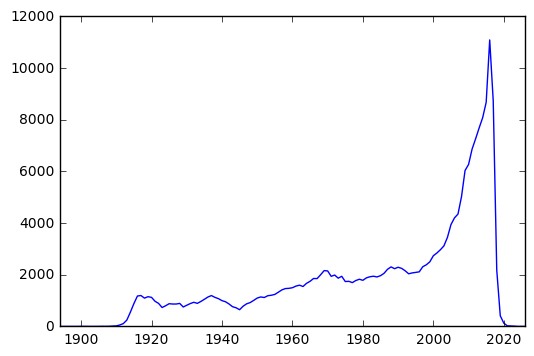

In [25]:
titles.year.value_counts().sort_index().plot() # there is a serge in 2016

In [26]:
movies_1950 = titles[titles.year == 1950]
len(movies_1950)

1099

In [27]:
movies_2016 = titles[titles.year == 2016]
len(movies_2016)

11090

#### Now let's look at the cast data

In [28]:
cast = pd.read_csv('cast.csv')

In [29]:
hc = cast.head(10)

In [30]:
hc[hc.n.notnull()]

,title,year,name,type,character,n
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0


In [31]:
hc.n.isnull().values.sum() # how many "not a number (nan)" values

7

In [32]:
hc.n.notnull().values.sum()

3

In [33]:
cast = cast.fillna('')

In [34]:
hc[hc.title.str.startswith('Battle')]

,title,year,name,type,character,n
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0


In [35]:
c_char = cast[cast.character.str.startswith('Kermit the Frog')]
len(c_char)

10

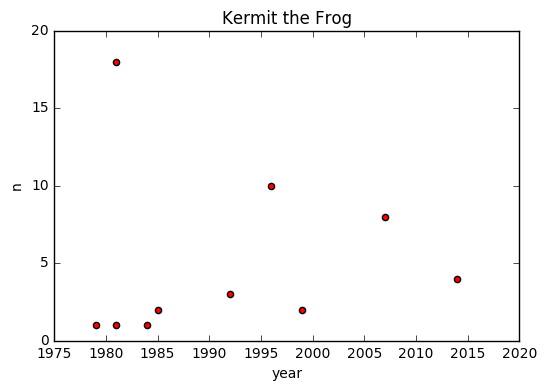

In [36]:
c_char.plot(x = 'year', y= 'n', kind = 'scatter', marker = 'o', color = 'red', title = "Kermit the Frog")

In [37]:
%time 
cast[cast.title == 'Sleuth'] # why time is not working?

,title,year,name,type,character,n
251028,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,
315589,Sleuth,1972,Michael Caine,actor,Milo Tindle,2
315590,Sleuth,2007,Michael Caine,actor,Andrew,1
361404,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3
361405,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,
1250467,Sleuth,2007,Jude Law,actor,Milo,2
1400595,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6
1416730,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4
1648990,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1
1746091,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3


In [38]:
%%time?

In [39]:
cast.shape

(3621779, 6)

In [40]:
ci = cast.set_index('title').sort_index() # it takes quite a while becasue its sorting through values

In [41]:
ci.loc['Sleuth'] # now very fast

,year,name,type,character,n
title,,,,,
Sleuth,2007,Harold Pinter,actor,Man on T.V.,3
Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,
Sleuth,1972,Michael Caine,actor,Milo Tindle,2
Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4
Sleuth,1972,Eve (III) Channing,actress,Marguerite Wyke,5
Sleuth,2007,Carmel O'Sullivan,actress,Maggie,
Sleuth,2007,Michael Caine,actor,Andrew,1
Sleuth,2007,Jude Law,actor,Milo,2
Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,


In [42]:
ci_yr_and_ti = cast.set_index(['title', 'year']).sort_index() # we can set two indices (better to sort through data of a column)

In [43]:
ci_yr_and_ti.loc['Sleuth', 1972]

name     type                   character  n
title  year                                                            
Sleuth 1972       Michael Caine    actor                 Milo Tindle  2
       1972      Alec Cawthorne    actor           Inspector Doppler  3
       1972        Teddy Martin    actor      Police Constable Higgs  6
       1972  John (II) Matthews    actor  Detective Sergeant Tarrant  4
       1972    Laurence Olivier    actor                 Andrew Wyke  1
       1972  Eve (III) Channing  actress             Marguerite Wyke  5

In [44]:
ci_yr_and_ti_reset = ci_yr_and_ti.reset_index(['title', 'year']) #resetting indexes 
ci_yr_and_ti_reset.head()

,title,year,name,type,character,n
0,#1 Serial Killer,2013,Michael Alton,actor,Detective Roberts,17
1,#1 Serial Killer,2013,Aaron Aoki,actor,Plastic Bag Victim,21
2,#1 Serial Killer,2013,Zachary (X) Brown,actor,Africian American Teen,18
3,#1 Serial Killer,2013,Yvis Cannavale,actor,Homeless Man,25
4,#1 Serial Killer,2013,Patrick Chien,actor,Cleaver Victim,22


#### George Clooney movies

In [45]:
c = cast[cast.name == "George Clooney"]

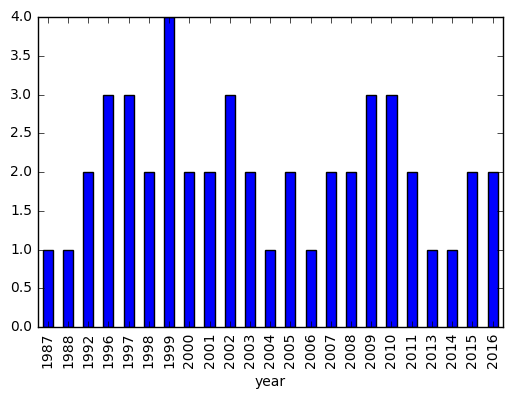

In [46]:
c.groupby(['year']).size().plot(kind = 'bar') 

In [47]:
c.groupby(['year']).n.max() # significance of his roles over the years, lower n menas he is the main character/significant role

year
1987    15
1988     2
1992    23
1996      
1997     2
1998    14
1999      
2000     1
2001    36
2002    17
2003    22
2004     3
2005    15
2006     1
2007     6
2008     5
2009     1
2010      
2011     2
2013     2
2014     1
2015     4
2016     2
Name: n, dtype: object

In [73]:
c.groupby(['title', 'year', 'character']).size() # we can also groupby by different keys

title                               year  character               
A Very Murray Christmas             2015  George Clooney              1
Batman & Robin                      1997  Batman                      1
                                          Bruce Wayne                 1
Burn After Reading                  2008  Harry Pfarrer               1
Confessions of a Dangerous Mind     2002  Jim Byrd                    1
Curdled                             1996  Seth Gecko                  1
Fantastic Mr. Fox                   2009  Mr. Fox                     1
From Dusk Till Dawn                 1996  Seth Gecko                  1
Good Night, and Good Luck.          2005  Fred Friendly               1
Gravity                             2013  Matt Kowalski               1
Hail, Caesar!                       2016  Baird Whitlock              1
Intolerable Cruelty                 2003  Miles                       1
Leatherheads                        2008  Dodge Connelly             

#### Some tutorial problems: 1) How many cast members in the movie Inception

In [51]:
inception = cast[cast.title == "Inception"] # How many cast members in the movie inception
len(inception)

77

In [52]:
inception.n.notnull().values.sum() # how many got an "n" value

77

#### 2) Number of Cary Grant movies as supporting actress

In [53]:
carry_grant = cast[(cast.name == "Cary Grant") & (cast.n==2.0)].sort('year')
len(carry_grant)

20

#### Cannot resist to play with Shah Rukh Khan data

In [54]:
srk = cast[(cast.name == "Shah Rukh Khan") & (cast.character.str.startswith('Raj'))].sort('year')
srk # Just a fun fact about King khan, his character name is always Raj (or Rahul)

,title,year,name,type,character,n
1151037,Deewana,1992,Shah Rukh Khan,actor,Raja Sahai,3
1151101,Raju Ban Gaya Gentleman,1992,Shah Rukh Khan,actor,Raj Mathur 'Raju',1
1151044,Dilwale Dulhania Le Jayenge,1995,Shah Rukh Khan,actor,Raj Malhotra,1
1151025,Baadshah,1999,Shah Rukh Khan,actor,Raj 'Baadshah',2
1151085,Mohabbatein,2000,Shah Rukh Khan,actor,Raj Aryan Malhotra,2
1151032,Chalte Chalte,2003,Shah Rukh Khan,actor,Raj Mathur,1
1151063,Heyy Babyy,2007,Shah Rukh Khan,actor,Raj Malhotra,
1151042,Dilwale,2015,Shah Rukh Khan,actor,Raj,


In [74]:
srk1 = cast[cast.name == "Shah Rukh Khan"]
len(srk1), len(srk) # Total number of movies and movies played as character 'Raj"

(101, 8)

In [56]:
srk2 = cast[(cast.name == "Shah Rukh Khan") & (cast.character.str.startswith('Rahul'))].sort('year')
len(srk2) # fun fact again, raj and rahul is tied with number 8

8

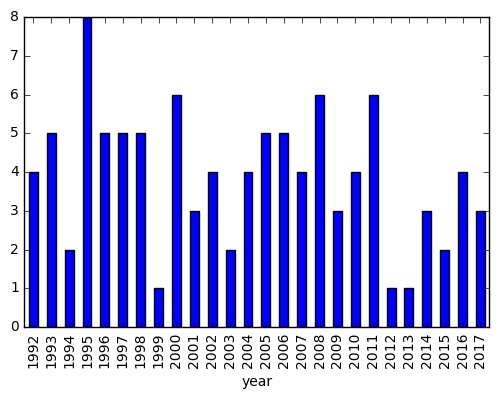

In [75]:
srk1.groupby(['year']).size().plot(kind = 'bar') # number of movies over the years (More than George Clooney)

In [58]:
srk3 = srk2.groupby(['year', 'title', 'character']).size()
srk3.unstack().fillna('') 

# Whenever he plays as "Rahul" (or Raj), he is the main character #Also, practiced unstacking

character                        Rahul Rahul (Special Appearence) Rahul Joshi  \
year title                                                                      
1993 Darr                                                                       
1995 Zamaana Deewana                                                            
1997 Dil To Pagal Hai                1                                          
     Yes Boss                                                               1   
1998 Kuch Kuch Hota Hai                                                         
2000 Har Dil Jo Pyar Karega...                                  1               
2001 Kabhi Khushi Kabhie Gham...                                                
2013 Chennai Express                 1                                          

character                        Rahul Khanna Rahul Malhotra Rahul Mehra  \
year title                                                                 
1993 Darr                                                              1   
1995 Zamaana Deewana                                       1               
1997 Dil To Pagal Hai                                                      
     Yes Boss                                                              
1998 Kuch Kuch Hota Hai                     1                              
2000 Har Dil Jo Pyar Karega...                                             
2001 Kabhi Khushi Kabhie Gham...                                           
2013 Chennai Express                                                       

character                        Rahul Raichand  
year title                                       
1993 Darr                                        
1995 Zamaana Deewana                             
1997 Dil To Pagal Hai                            
     Yes Boss                                    
1998 Kuch Kuch Hota Hai                          
2000 Har Dil Jo Pyar Karega...                   
2001 Kabhi Khushi Kabhie Gham...              1  
2013 Chennai Express

In [59]:
qgrid.show_grid(srk1)

#### Now let's get back to the problems again

In [60]:
titles['title'].value_counts().head(10) # maximum number of movies of all time

Hamlet                  18
Carmen                  16
Macbeth                 15
Maya                    12
The Outsider            12
Freedom                 11
Kismet                  11
Othello                 11
Temptation              11
The Three Musketeers    11
Name: title, dtype: int64

#### Which three years of 1930s have the most numbers of movies

In [61]:
title_1930_1940 = titles[(titles.year >= 1930) & (titles.year <= 1940)]
title_1930_1940 = title_1930_1940.sort('year')
title_1930_1940.year.value_counts().head(3) # Three years of 1930s with most number of movies

1937    1195
1936    1138
1938    1126
Name: year, dtype: int64

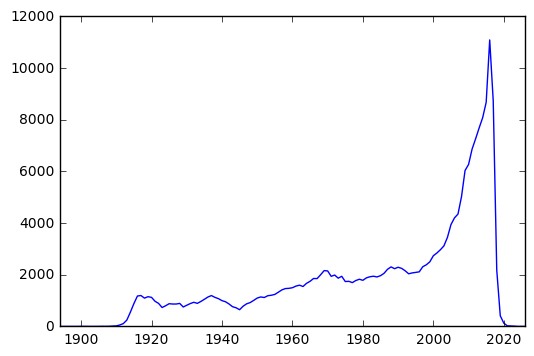

In [62]:
titles.year.value_counts().sort_index().plot()

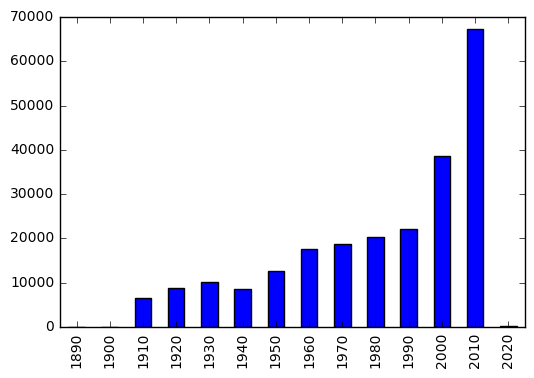

In [63]:
(titles.year//10*10).value_counts().sort_index().plot(kind = 'bar') # Number of movies by decades

In [64]:
actress_who = cast[cast.character == "Herself"]
actress_who.name.value_counts().head()

Queen Elizabeth II    11
Joyce Brothers         9
Margaret Thatcher      7
Hillary Clinton        7
Mary Jo Pehl           7
Name: name, dtype: int64

In [67]:
cast.character.value_counts().head(10)

Himself        19576
Dancer         12038
Extra          10920
Reporter        8144
Doctor          7412
Student         7175
Policeman       6878
Party Guest     6723
Nurse           6655
Bartender       6590
Name: character, dtype: int64